# Описание
Обучение xgboost XGBRegressor для предсказания суммы контрактов по датасету хакатона.
Иерархическая кластеризация данных по нашему датасету

# XGBoost
### Предсказание суммы контрактов

### Анализ данных

In [ ]:
# Импорт необходимых библиотек
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from random import randint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import random
import xgboost
import random

In [ ]:
# Чтение датасетов хакатона
data_generations = pd.read_excel('Датасет (Департамент информационных технологий города Москвы).xlsx')
data_products = pd.read_csv('Датасет (Продуктовая корзина).csv',sep=';')

In [ ]:
# Размер датафрейма
data_generations.shape

(13571, 5)

In [ ]:
# Описание
data_generations.describe()

,sum
count,13571.000000
mean,860.180606
std,2365.055498
min,1.000000
25%,16.000000
50%,106.000000
75%,528.500000
max,41508.000000


In [ ]:
# Первые 5 записей
data_generations.head()

,house_district,person_gender,Возрастной класс,person_exemption_group,sum
0,Академический,f,18-25,Многодетные,100
1,Академический,f,18-25,NaN,3895
2,Академический,f,25-45,Беременность,318
3,Академический,f,25-45,Инвалид,159
4,Академический,f,25-45,Малоимущие,3


In [ ]:
# Количесто пустых записей
data_generations.isnull().sum()

house_district               0
person_gender                0
Возрастной класс             0
person_exemption_group    2335
sum                          0
dtype: int64

In [ ]:
# Размер датафрейма
data_products.shape

(336497, 18)

In [ ]:
# Описание
data_products.describe()

,Id,Количество действующих оферт,Количество контрактов,Сумма в составе контрактов
count,3.364970e+05,336497.000000,336497.000000,8.765000e+04
mean,1.287212e+07,0.625634,0.584617,2.000752e+05
std,8.699350e+06,0.943035,3.711969,9.326859e+05
min,1.100321e+06,0.000000,0.000000,1.010000e+00
25%,1.250700e+06,0.000000,0.000000,6.093920e+03
50%,1.777919e+07,0.000000,0.000000,3.900000e+04
75%,1.991760e+07,1.000000,1.000000,1.804356e+05
max,2.190947e+07,79.000000,670.000000,8.932870e+07


In [ ]:
# Первые 5 записей
data_products.head()

,Id,Наменование,Производитель,Вид продукции,Вид товаров,Количество действующих оферт,Количество контрактов,Сумма в составе контрактов,Страна происхождения,Длина,Ширина,Высота,Объем,Диаметр,Вес,Материал,Цвет,Гарантийный срок
0,1164189,Endever SkyLine DP-40 настольная плита,Endever,Плиты,Варочная панель,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2325 г,NaN,NaN,NaN
1,1164204,Endever IP-33 индукционная плита,Endever,Плиты,Варочная панель,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740 г,NaN,NaN,NaN
2,1164206,"Energy EN-901, White настольная плита",Energy,Плиты,Варочная панель,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1445 г,NaN,NaN,NaN
3,1164221,Endever Skyline IP-39 индукционная настольная ...,Endever,Плиты,Варочная панель,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490 г,NaN,NaN,NaN
4,1164223,Energy EN-901B электроплитка,Energy,Плиты,Варочная панель,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1455 г,NaN,NaN,NaN


In [ ]:
# Количесто пустых записей
data_products.isnull().sum()

Id                                   0
Наменование                          0
Производитель                    73601
Вид продукции                        0
Вид товаров                          0
Количество действующих оферт         0
Количество контрактов                0
Сумма в составе контрактов      248847
Страна происхождения            336489
Длина                           304723
Ширина                          300131
Высота                          305404
Объем                           323379
Диаметр                         324164
Вес                             257633
Материал                        335950
Цвет                            336423
Гарантийный срок                324772
dtype: int64

In [ ]:
# Стандартное отклонение и среднее по колонке "Сумма в составе контрактов"
std,mean = data_products['Сумма в составе контрактов'].dropna().std(),data_products['Сумма в составе контрактов'].dropna().mean()

In [ ]:
# Заполнение пустых значений
x = np.random.normal(mean,std,336497)
m = (data_products['Сумма в составе контрактов'].min() - min(x))
x = [i+m for i in x]
data_products['Сумма в составе контрактов'] = list(map(int,x))

In [ ]:
# Заполнение пустых значений
data_products['Количество действующих оферт'] = random.sample(list(data_products['Количество действующих оферт']),336497)

In [ ]:
# Заполнение пустых значений
x = [randint(1,10) for i in range(data_products.shape[0])]
data_products['Страна происхождения'] = x

Пусть              
1 - Китай,
2 - Россия, 
3 - СНГ,
4 - США, 
5 - Япония, 
6 - Корея,
7 - Вьетнам, 
8 - Германия, 
9 - Швеция, 
10 - Франция 


In [ ]:
# Вес товаров, заполнение средним значением по весу пустые значения
data_products['Вес'] = data_products['Вес'].apply(lambda x: (str(x).split()[0].replace('от','')) if (str(x).split()[0]!='nan' and str(x).split()[0].isnumeric()) else None)
data_products['Вес'] = data_products['Вес'].fillna(808.4).astype(int)

In [ ]:
# Т.к. все значения в колонках ниже пустые - заполняем их

l = []
for j in range(336497+1000//240):
  for i in range(240):
    l.append(i)
data_products['Длина'] = random.sample(l,336497)
l = []
for j in range(336497+1000//240):
  for i in range(120):
    l.append(i)
data_products['Ширина'] = random.sample(l,336497)
l = []
for j in range(336497+1000//240):
  for i in range(360):
    l.append(i)
data_products['Высота'] = random.sample(l,336497)
l = []
for j in range(336497+1000//240):
  for i in range(120):
    l.append(i)
data_products['Объем'] = random.sample(l,336497)
l = []
for j in range(336497+1000//240):
  for i in range(90):
    l.append(i)
data_products['Диаметр'] = random.sample(l,336497)
l = []
for j in range(336497+1000//240):
  for i in range(50):
    l.append(i)
data_products['Материал'] = random.sample(l,336497)
l = []
for j in range(336497+1000//240):
  for i in range(140):
    l.append(i)
data_products['Цвет'] = random.sample(l,336497)

In [ ]:
# Удаление колонк
data_products = data_products.drop(['Id','Наменование','Производитель','Гарантийный срок'],axis=1)

In [ ]:
# Факторизация категориальных признаков
data_products['Вид продукции'] = pd.factorize(data_products['Вид продукции'])[0]
data_products['Вид товаров'] = pd.factorize(data_products['Вид товаров'])[0]

In [ ]:
# Готовый датафрейм
data_products.head()

,Вид продукции,Вид товаров,Количество действующих оферт,Количество контрактов,Сумма в составе контрактов,Страна происхождения,Длина,Ширина,Высота,Объем,Диаметр,Вес,Материал,Цвет
0,0,0,2,0,3185908,3,198,49,65,6,63,2325,38,51
1,0,0,0,0,3102378,7,128,58,235,73,9,2740,28,132
2,0,0,0,0,4867981,7,78,8,359,55,59,1445,34,33
3,0,0,1,0,3891447,8,10,94,95,20,62,1490,31,66
4,0,0,0,0,3742888,7,107,0,162,36,45,1455,27,31


In [ ]:
# Инициализация модели
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [ ]:
# Разделение данных на обучающую и тест выборку
X_train, X_test, y_train, y_test = train_test_split(data_products.drop('Сумма в составе контрактов',axis=1),data_products['Сумма в составе контрактов'],test_size=0.3)

In [ ]:
# Тренировка
model.fit(X_train,y_train)

[07:40:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None, n_estimators=1,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             silent=None, subsample=0.6, verbosity=1)

In [ ]:
# Важные признаки
model.feature_importances_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Среднеквадратичная ошибка
mean_squared_error(y_test,model.predict(X_test))

# Иерархическая кластеризация

In [ ]:
# Импорт необходимых библиотек
from matplotlib.pyplot import figure
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Чтение нашего датасета
data = pd.read_excel('data-28509-2020-07-15.xlsx')

In [ ]:
# Первые 5 записей
data.head()

,global_id,ID,Name,IsNetObject,OperatingCompany,TypeService,TypeObject,AdmArea,District,Address,PublicPhone,WorkingHours,ClarificationOfWorkingHours,geoData
0,637390942,69305,Одежда. Обувь. Промтовары,нет,NaN,реализация непродовольственных товаров,Магазин «Промтовары»,Северный административный округ,район Беговой,"город Москва, Беговая аллея, дом 3А",(977) 757-40-37,День недели: понедельник\nЧасы работы: 09:30-2...,NaN,"{type=Point, coordinates=[37.564782, 55.783360..."
1,637391109,69320,АЙКОВЕР,нет,NaN,реализация непродовольственных товаров,Магазин-салон,Центральный административный округ,Тверской район,"город Москва, Новослободская улица, дом 50/1, ...",(499) 250-12-40,День недели: понедельник\nЧасы работы: 10:00-2...,NaN,"{type=Point, coordinates=[37.59484948239575, 5..."
2,637391684,69340,Магазин «Радуга»,нет,NaN,реализация продовольственных товаров,Магазин «Продукты»,Юго-Восточный административный округ,район Марьино,"город Москва, Марьинский бульвар, дом 4",(909) 977-22-02,День недели: понедельник\nЧасы работы: 10:00-2...,NaN,"{type=Point, coordinates=[37.749818553954185, ..."
3,637391714,69342,Точка любви,да,Точка любви,реализация непродовольственных товаров,Прочие специализированные непродовольственные ...,Северный административный округ,район Беговой,"город Москва, Ленинградский проспект, дом 12",(985) 780-51-78,День недели: понедельник\nЧасы работы: 10:00-2...,NaN,"{type=Point, coordinates=[37.578783498641165, ..."
4,637391844,69347,ПРОДУКТЫ,нет,NaN,реализация продовольственных товаров,Магазин «Продукты»,Юго-Восточный административный округ,район Лефортово,"город Москва, Волочаевская улица, дом 40Б",(495) 361-17-35,День недели: понедельник\nЧасы работы: круглос...,NaN,"{type=Point, coordinates=[37.67813953250334, 5..."


In [ ]:
# Удаление лишних колонок
data = data.drop(['global_id','ID','OperatingCompany','WorkingHours','PublicPhone','ClarificationOfWorkingHours','Name','Address','District','AdmArea'],axis=1)

In [ ]:
# Преобразование категориальных признаков One-Hot Encoding
data = pd.get_dummies(data,columns=['TypeService','IsNetObject','TypeObject'])

In [ ]:
# Разделение geoData на X и Y
r1 = []
r2 = []
for i in data.geoData:
  x,y = eval(i.split('coordinates=')[1].replace('}',''))
  r1.append(float(x))
  r2.append(float(y))
data['x'] = r1
data['y'] = r2
data = data.drop('geoData',axis=1)
data.head()

,TypeService_реализация непродовольственных товаров,TypeService_реализация продовольственных товаров,IsNetObject_да,IsNetObject_нет,TypeObject_Автосалон,TypeObject_Аутлет-магазины,TypeObject_Военторг,TypeObject_Гастроном,TypeObject_Гипермаркет (непродовольственный),TypeObject_Гипермаркет (продовольственный),TypeObject_Каскет (бутик для среднего класса),TypeObject_Комиссионный магазин,TypeObject_Магазин «Алкогольные напитки»,TypeObject_Магазин «Бутик»,TypeObject_Магазин «Дискаунтер»,TypeObject_Магазин «Дисконт»,TypeObject_Магазин «Зоотовары»,TypeObject_Магазин «Книги»,TypeObject_Магазин «Колбасы»,TypeObject_Магазин «Кэш энд Кэрри»,TypeObject_Магазин «Мебель»,TypeObject_Магазин «Минеральные воды»,TypeObject_Магазин «Мир садовода»,TypeObject_Магазин «Мясо»,TypeObject_Магазин «Обувь»,TypeObject_Магазин «Овощи-фрукты»,TypeObject_Магазин «Одежда»,TypeObject_Магазин «Охотник»,TypeObject_Магазин «Природа»,TypeObject_Магазин «Продукты»,TypeObject_Магазин «Промтовары»,TypeObject_Магазин «Рыба»,TypeObject_Магазин «Секонд Хенд»,TypeObject_Магазин «Семена»,TypeObject_Магазин «Спорт и туризм»,TypeObject_Магазин «Ткани»,TypeObject_Магазин «Хлеб»,TypeObject_Магазин «Хозяйственные товары»,TypeObject_Магазин «Цветы»,TypeObject_Магазин «Электротовары»,TypeObject_Магазин товаров повседневного спроса,TypeObject_Магазин-салон,TypeObject_Магазин-склад,TypeObject_Магазин-склад непродовольственный (опт),TypeObject_Минимаркет,TypeObject_Прочие специализированные непродовольственные предприятия торговли,TypeObject_Прочие специализированные продовольственные предприятия торговли,TypeObject_С комбинированным ассортиментом,TypeObject_Со смешанным ассортиментом,TypeObject_Стоковый магазин (магазин «Сток»),TypeObject_Супермаркет,TypeObject_Товары для будущих мам,TypeObject_Товары для детей,TypeObject_Товары для дома,TypeObject_Товары для женщин,TypeObject_Товары для молодежи,TypeObject_Товары для мужчин,TypeObject_Товары для новобрачных,TypeObject_Товары для полных,"TypeObject_Торговые центры (аутлет-центр, молл, ритейл-парк)",TypeObject_Торговый Дом,TypeObject_Универмаг,TypeObject_Универмаг «Детский Мир»,TypeObject_Универсальный общетоварный непродовольственный склад,TypeObject_Универсальный общетоварный продовольственный склад,TypeObject_Универсам,TypeObject_Центр оптовой и мелкооптовой непродовольственной торговли,x,y
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.564782,55.783361
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.594849,55.786559
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.749819,55.647955
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.578783,55.780188
4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.678140,55.752482


In [ ]:
# Отбор 20000 точек
i = 20000
data_values = data.values[:i]

In [ ]:
# Кластеризации
cl = AgglomerativeClustering(n_clusters=None,compute_full_tree =True,distance_threshold =40).fit(data_values)


In [ ]:
# Метки
labels = cl.labels_

In [ ]:
# Массив точек X и Y
X = data['x'][:i]
Y = data['y'][:i]

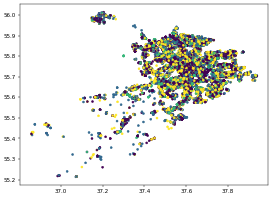

In [ ]:
# Визуализация точек с соответствующими метками
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X, Y, c=labels, s=12, cmap='viridis')